In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load csv file
df =pd.read_csv("complaints.csv")
 
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",FL,33137,NaN,NaN,Web,2025-08-07,In progress,Yes,NaN,15143838.0
1,2025-08-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76226,NaN,NaN,Web,2025-08-27,In progress,Yes,NaN,15543375.0
2,2025-08-06,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33175,NaN,NaN,Web,2025-08-06,In progress,Yes,NaN,15110748.0
3,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,07104,NaN,NaN,Web,2025-08-07,In progress,Yes,NaN,15138697.0
4,2025-08-01,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77357,NaN,NaN,Web,2025-08-01,In progress,Yes,NaN,15041548.0


In [29]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

#DataCleaning


In [3]:
#cheking missing values

print("Missing values per columns:")
print(df.isnull().sum())

Missing values per columns:
Date received                         0
Product                               0
Sub-product                       31030
Issue                                 1
Sub-issue                        145039
Consumer complaint narrative    2524293
Company public response         1812065
Company                               0
State                             10670
ZIP code                           3346
Tags                            3340640
Consumer consent provided?       750064
Submitted via                         1
Date sent to company                  1
Company response to consumer          6
Timely response?                      1
Consumer disputed?              3408627
Complaint ID                          1
dtype: int64


In [4]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498767 entries, 0 to 3498766
Data columns (total 18 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Consumer complaint narrative  object 
 6   Company public response       object 
 7   Company                       object 
 8   State                         object 
 9   ZIP code                      object 
 10  Tags                          object 
 11  Consumer consent provided?    object 
 12  Submitted via                 object 
 13  Date sent to company          object 
 14  Company response to consumer  object 
 15  Timely response?              object 
 16  Consumer disputed?            object 
 17  Complaint ID                  float64
dtypes: float64(1), object(

In [6]:
#checking the null values
df.isnull().sum().sort_values(ascending=False).head(10)

Consumer disputed?              3408627
Tags                            3340640
Consumer complaint narrative    2524293
Company public response         1812065
Consumer consent provided?       750064
Sub-issue                        145039
Sub-product                       31030
State                             10670
ZIP code                           3346
Company response to consumer          6
dtype: int64

In [30]:
df=df.drop(['Consumer complaint narrative','Company public response','Consumer consent provided?','Consumer disputed?','Tags'],axis=1, errors='ignore')

In [31]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"EQUIFAX, INC.",FL,33137,Web,2025-08-07,In progress,Yes,15143838.0
1,2025-08-27,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,76226,Web,2025-08-27,In progress,Yes,15543375.0
2,2025-08-06,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33175,Web,2025-08-06,In progress,Yes,15110748.0
3,2025-08-07,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NJ,07104,Web,2025-08-07,In progress,Yes,15138697.0
4,2025-08-01,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77357,Web,2025-08-01,In progress,Yes,15041548.0


In [34]:
#remove duplicates
df=df.drop_duplicates()

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498767 entries, 0 to 3498766
Data columns (total 13 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 object 
 1   Product                       object 
 2   Sub-product                   object 
 3   Issue                         object 
 4   Sub-issue                     object 
 5   Company                       object 
 6   State                         object 
 7   ZIP code                      object 
 8   Submitted via                 object 
 9   Date sent to company          object 
 10  Company response to consumer  object 
 11  Timely response?              object 
 12  Complaint ID                  float64
dtypes: float64(1), object(12)
memory usage: 347.0+ MB
None


In [39]:
numeric_cols =['ZIP code', 'Complaint ID']

In [40]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [42]:
date_cols=['Date received', 'Date sent to company']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors ='coerce')

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498767 entries, 0 to 3498766
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Sub-product                   object        
 3   Issue                         object        
 4   Sub-issue                     object        
 5   Company                       object        
 6   State                         object        
 7   ZIP code                      float64       
 8   Submitted via                 object        
 9   Date sent to company          datetime64[ns]
 10  Company response to consumer  object        
 11  Timely response?              object        
 12  Complaint ID                  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 347.0+ MB


In [48]:
df['Issue'].value_counts()

Issue
Incorrect information on your report                                                1559005
Improper use of your report                                                          752864
Problem with a company's investigation into an existing problem                      470486
Problem with a credit reporting company's investigation into an existing problem     106482
Attempts to collect debt not owed                                                     87956
                                                                                     ...   
Lost or stolen refund                                                                     4
Property was sold                                                                         3
Property was damaged or destroyed property                                                1
Lender sold the property                                                                  1
Problem with an overdraft                                                 

In [49]:
#shows how many complaints were resolved, closed, or pending
df['Company response to consumer'].value_counts()

Company response to consumer
Closed with explanation            1654404
Closed with non-monetary relief    1229365
In progress                         567748
Closed with monetary relief          37935
Untimely response                     5324
Closed                                1840
Closed without relief                 1624
Closed with relief                     521
Name: count, dtype: int64

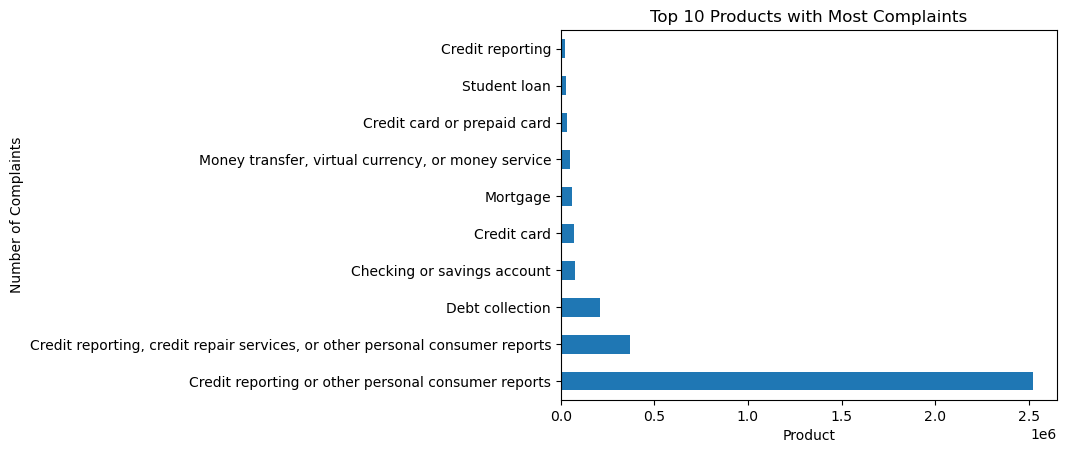

In [85]:
df['Product'].value_counts().head(10).plot(kind='barh')

plt.title("Top 10 Products with Most Complaints")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.show()

ValueError: cannot reindex on an axis with duplicate labels

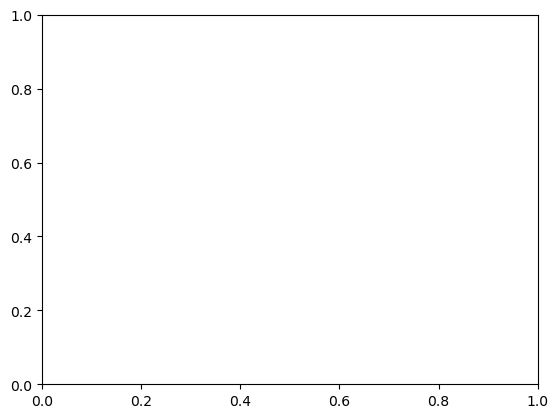

In [89]:
sns.countplot(x='Submitted via',data=df, order =df['Submitted via'].value_counts().index)

plt.title("Complaints by submission Method")
plt.xticks(rotation=45)
plt.show()